<a href="https://colab.research.google.com/github/tadeugomes/mba_enap_python/blob/main/Exercicios/Aula5_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 5 - Exercícios - Python e Pandas

### Documentação do Autograder [Link](https://github.com/alexlopespereira/mba_enap/blob/main/Exercicios/Autograder.ipynb)


*   Link para o gabarito das questões
*   Imports padrão
*   Instalação
*   Autenticaçao para nota
*   Validação




In [1]:
!pip install --upgrade ipynb_autograde 1> /dev/null

In [2]:
%env  COURSE=mba_enap
from ipynb_autograde.main import init_log, validate
init_log()
email_result=!gcloud config get-value account
if not email_result or 'unset' in email_result[0]:
  !gcloud auth login

env: COURSE=mba_enap
Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=0A1FpR0ThVRk3Dn4WJRNFNuNw1bEPw&prompt=consent&token_usage=remote&access_type=offline&code_challenge=PjD9Q6_Xu1oQis93ye4WI7dh_YdSHNBFV8wosGxIA0w&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0ASVgi3IDWkIf00pSzY20mFbMMUPUnaLP02IDnA5vV9k0yK1P2APY7vlUCNBCqwgE1jXU-Q

You are now logged in as [tagote@gmail.com].
Your 

### Onde buscar informações sobre as funções do Pandas
[https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/)

In [3]:
# Importe as bibliotecas pandas e numpy
import pandas as pd
import numpy as np

### 5.1 Resolva o problema abaixo com uma função python que utilize umá serie do pandas:
#### **Dica**: operação de conjuntos
#### Entradas : ```[1, 2, 3, 4, 5, 6, 7, 8]``` e ```[2, 4, 6, 8, 10, 12]```
#### Resultado Esperado: ```[1, 3, 5, 7]```



In [5]:
prompt51="""import pandas as pd

def find_unique_elements(list1, list2):

    series1 = pd.Series(list1)
    series2 = pd.Series(list2)

    # Utilizando a operação de diferença entre conjuntos
    unique_elements = series1[~series1.isin(series2)].tolist()
    return unique_elements

# Exemplo de uso
list1 = [1, 2, 3, 4, 5, 6, 7, 8]
list2 = [2, 4, 6, 8, 10, 12]
resultado = find_unique_elements(list1, list2)
print(resultado)
"""

In [6]:
validate(prompt51, "A5-E1")

Codigo gerado: 
def find_unique_elements(list1, list2):
    series1 = pd.Series(list1)
    series2 = pd.Series(list2)

    unique_elements = series1[~series1.isin(series2)].tolist()
    return unique_elements

✅ Passed the Test Case!
  Expected: [1, 3, 5, 7]
  Delivered: [1, 3, 5, 7]


### 5.2 Resolva o problema abaixo com uma função python que utilize umá serie do pandas:
#### **Dica**: operação de conjuntos
#### Entrada: ```[1, 2, 3, 4, 5, 6, 7, 8]``` e ```[2, 4, 6, 8, 10, 12]```
#### Resultado Esperado: ```[1, 3, 5, 7,10,12]```


In [9]:
prompt52="""import pandas as pd

def symmetric_difference(series1, series2):

    set1 = set(series1)
    set2 = set(series2)
    result = set1.symmetric_difference(set2)
    return sorted(result)

# Exemplo de uso
s1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8])
s2 = pd.Series([2, 4, 6, 8, 10, 12])

resultado = symmetric_difference(s1, s2)
print(resultado)
"""

In [10]:
validate(prompt52, "A5-E2")

Codigo gerado: 
def symmetric_difference(series1, series2):
    set1 = set(series1)
    set2 = set(series2)
    result = set1.symmetric_difference(set2)
    return sorted(result)

✅ Passed the Test Case!
  Expected: [1, 3, 5, 7, 10, 12]
  Delivered: [1, 3, 5, 7, 10, 12]


### Instruções para Questões 5.3 a 5.5
#### Considere que todos os dataframes de entrada e de saída estão no seguinte formato (o conteúdo varia de acordo com o exercício):
```
[{"name": "Anastasia", "score": 12.5, "attempts": 1, "qualify": "yes"},
{"name": "Dima", "score": 9.0, "attempts": 3, "qualify": "no"},
{"name": "Katherine", "score": 16.5, "attempts": 2, "qualify": "yes"},
{"name": "James", "score": "", "attempts": 3, "qualify": "no"}]
```

#### Obs.: As entradas e saídas serão dicionários porque um json não consegue armazenar um Dataframe. Mas o json pode armazenar um dicionário com os mesmos dados.

### 5.3 Escreva um prompt de uma função para transformar o dataframe gerado a partir da entrada no dataframe especificado pela saída e retornar o resultado no formato de um dicionário.

#### **Dica**: filtrar um dataframe

#### Entrada:
1o argumento da função
```
[
  {"name": "Anastasia", "score": 12.5, "attempts": 1, "qualify": "yes"},
  {"name": "Dima", "score": 9.0, "attempts": 3, "qualify": "no"},  
  {"name": "Katherine", "score": 16.5, "attempts": 2, "qualify": "yes"},
  {"name": "James", "score": "", "attempts": 3, "qualify": "no"},  
  {"name": "Emily", "score": 9.0, "attempts": 2, "qualify": "no"},
  {"name": "Michael", "score": 20.0, "attempts": 3, "qualify": "yes"},
  {"name": "Matthew", "score": 14.5, "attempts": 1, "qualify": "yes"},
  {"name": "Laura", "attempts": 1, "qualify": "no"}]
```
A entrada é somente o dicionário acima. A tabela abaixo é só para facilitar a visualização.

| name      |   score |   attempts | qualify   |
|:----------|--------:|-----------:|:----------|
| Anastasia |    12.5 |          1 | yes       |
| Dima      |     9   |          3 | no        |
| Katherine |    16.5 |          2 | yes       |
| James     |         |          3 | no        |
| Emily     |     9   |          2 | no        |
| Michael   |    20   |          3 | yes       |
| Matthew   |    14.5 |          1 | yes       |
| Laura     |         |          1 | no        |

E o 2o argumento da função ```'score'```

#### Resultado esperado:
```
[
{"name": "James", "attempts": 3, "qualify": "no"},
{"name": "Laura", "attempts": 1, "qualify": "no"}
]
```

| name   | attempts | qualify   |
|:-------|---------:|:----------|
| James  |        3 | no        |
| Laura  |        1 | no        |

In [14]:
prompt53="""import pandas as pd
import numpy as np

def filter_dataframe(data, column):

    # Converter a lista de dicionários em um DataFrame
    df = pd.DataFrame(data)

    # Substituir strings vazias por valores nulos (NaN)
    df[column] = df[column].replace("", np.nan)

    # Filtrar as linhas onde a coluna especificada está vazia (NaN)
    filtered_df = df[df[column].isnull()]

    # Selecionar apenas as colunas relevantes para o resultado
    filtered_df = filtered_df.drop(columns=[column])

    # Retornar o resultado como uma lista de dicionários
    return filtered_df.to_dict(orient='records')"""

In [15]:
validate(prompt53, "A5-E3")

Codigo gerado: 
def filter_dataframe(data, column):
    # Converter a lista de dicionários em um DataFrame
    df = pd.DataFrame(data)
    
    # Substituir strings vazias por valores nulos (NaN)
    df[column] = df[column].replace("", np.nan)
    
    # Filtrar as linhas onde a coluna especificada está vazia (NaN)
    filtered_df = df[df[column].isnull()]
    
    # Selecionar apenas as colunas relevantes para o resultado
    filtered_df = filtered_df.drop(columns=[column])
    
    # Retornar o resultado como uma lista de dicionários
    return filtered_df.to_dict(orient='records')

✅ Passed the Test Case!
  Expected: [{'attempts': 3, 'name': 'James', 'qualify': 'no'}, {'attempts': 1, 'name': 'Laura', 'qualify': 'no'}]
  Delivered: [{'attempts': 3, 'name': 'James', 'qualify': 'no'}, {'attempts': 1, 'name': 'Laura', 'qualify': 'no'}]


### 5.4 Escreva um prompt de uma função para transformar o dataframe gerado a partir da entrada no dataframe especificado pela saída e retornar o resultado no formato de um dicionário.
#### Entrada:
1o argumento da função

```
[
{"name": "Jose", "score": 12.5, "qualify": "yes"},
{"name": "Maria", "score": 9.0, "qualify": "no"},
{"name": "Joao", "score": 16.5, "qualify": "yes"},
{"name": "Pedro", "score": 13, "qualify": "no"}
]
```

A entrada está apresentadas acima. A tabela abaixo é só para facilitar a visualização.


| name      |   score | qualify   |
|:----------|--------:|:----------|
| Jose |    12.5 | yes       |
| Maria      |     9   | no        |
| Joao |    16.5 | yes       |
| Pedro     |   13   | no        |

2o, 3o e 4o argumentos da função:
```'name'```, ```'Pedro'``` e ```'Rafael'```

#### Resultado Esperado:
```
[
{"name": "Jose", "score": 12.5, "qualify": "yes"},
{"name": "Maria", "score": 9.0, "qualify": "no"},
{"name": "Joao", "score": 16.5, "qualify": "yes"},
{"name": "Rafael", "score": 13.0, "qualify": "no"}
]
```

A tabela abaixo é só para facilitar a visualização.

| name      |   score | qualify   |
|:----------|--------:|:----------|
| Jose |    12.5 | yes       |
| Maria      |     9   | no        |
| Joao |    16.5 | yes       |
| Rafael    |   13   | no        |



In [16]:
prompt54="""def transform_dataframe(data, key, old_value, new_value):

    # Iterar sobre os registros na lista
    for record in data:
        # Verificar se o valor da chave corresponde ao valor antigo
        if record.get(key) == old_value:
            # Alterar o valor para o novo valor
            record[key] = new_value
    return data"""

In [17]:
validate(prompt54, "A5-E4")

Codigo gerado: 
def transform_dataframe(data, key, old_value, new_value):
    for record in data:
        if record.get(key) == old_value:
            record[key] = new_value
    return data

✅ Passed the Test Case!
  Expected: [{'name': 'Jose', 'qualify': 'yes', 'score': 12.5}, {'name': 'Maria', 'qualify': 'no', 'score': 9.0}, {'name': 'Joao', 'qualify': 'yes', 'score': 16.5}, {'name': 'Rafael', 'qualify': 'no', 'score': 13.0}]
  Delivered: [{'name': 'Jose', 'qualify': 'yes', 'score': 12.5}, {'name': 'Maria', 'qualify': 'no', 'score': 9.0}, {'name': 'Joao', 'qualify': 'yes', 'score': 16.5}, {'name': 'Rafael', 'qualify': 'no', 'score': 13}]


### 5.5 Escreva um prompt de uma função para transformar o dataframe gerado a partir da entrada no dataframe especificado pela saída e retornar o resultado no formato de um dicionário.

#### Entrada:
```
[
{"name": "Jose", "score": 12.5, "qualify": "yes"},
{"name": "Maria", "score": 9.0, "qualify": "no"},
{"name": "Joao", "score": 16.5, "qualify": "yes"}
]
```
A entrada está apresentadas acima. A tabela abaixo é só para facilitar a visualização.

| name      |   score | qualify   |
|:----------|--------:|:----------|
| Jose |    12.5 | yes       |
| Maria      |     9   | no        |
| Joao |    16.5 | yes       |

#### Resultado Esperado:
```
[
{"name": "Jose", "score": 12.5, "qualify": 1},
{"name": "Maria", "score": 9.0, "qualify": 0},
{"name": "Joao", "score": 16.5, "qualify": 1}
]
```

A tabela abaixo é só para facilitar a visualização.

| name      |   score | qualify   |
|:----------|--------:|:----------|
| Jose |    12.5 | 1      |
| Maria      |     9   | 0     |
| Joao |    16.5 | 1      |


In [18]:
prompt55="""def transform_qualify_column(data):

    # Iterar sobre cada registro na lista e transformar o valor da chave 'qualify'
    for record in data:
        if record['qualify'] == "yes":
            record['qualify'] = 1
        elif record['qualify'] == "no":
            record['qualify'] = 0
    return data"""

In [19]:
validate(prompt55, "A5-E5")

Codigo gerado: 
def transform_qualify_column(data):
    for record in data:
        if record['qualify'] == "yes":
            record['qualify'] = 1
        elif record['qualify'] == "no":
            record['qualify'] = 0
    return data

✅ Passed the Test Case!
  Expected: [{'name': 'Jose', 'qualify': 1, 'score': 12.5}, {'name': 'Maria', 'qualify': 0, 'score': 9.0}, {'name': 'Joao', 'qualify': 1, 'score': 16.5}]
  Delivered: [{'name': 'Jose', 'qualify': 1, 'score': 12.5}, {'name': 'Maria', 'qualify': 0, 'score': 9.0}, {'name': 'Joao', 'qualify': 1, 'score': 16.5}]


### 5.6 Resolva o problema abaixo com uma função python que utilize umá serie do pandas

#### **Dica**: Ordenação do dataframe

#### Entrada:
```https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv```, ```price``` e ```3```

### Resultado esperado:

Um dicionário com os seguintes dados

|       |   carat | cut       | color   | clarity   |   depth |   table |   price |    x |    y |    z |
|------:|--------:|:----------|:--------|:----------|--------:|--------:|--------:|-----:|-----:|-----:|
| 27749 |    2.29 | Premium   | I       | VS2       |    60.8 |      60 |   18823 | 8.5  | 8.47 | 5.16 |
| 27748 |    2    | Very Good | G       | SI1       |    63.5 |      56 |   18818 | 7.9  | 7.97 | 5.04 |
| 27747 |    1.51 | Ideal     | G       | IF        |    61.7 |      55 |   18806 | 7.37 | 7.41 | 4.56 |

In [20]:
prompt56="""import pandas as pd

def top_n_diamonds(url, column, n):

    # Carregar o dataset
    df = pd.read_csv(url)

    # Ordenar pela coluna especificada em ordem decrescente
    sorted_df = df.sort_values(by=column, ascending=False)

    # Selecionar os primeiros n registros
    top_n = sorted_df.head(n)

    # Converter para dicionário
    return top_n.to_dict(orient='records')"""

In [21]:
validate(prompt56, "A5-E6")

Codigo gerado: 
def top_n_diamonds(url, column, n):
    df = pd.read_csv(url)
    sorted_df = df.sort_values(by=column, ascending=False)
    top_n = sorted_df.head(n)
    return top_n.to_dict(orient='records')

✅ Passed the Test Case!
  Expected: [{'carat': 2.29, 'clarity': 'VS2', 'color': 'I', 'cut': 'Premium', 'depth': 60.8, 'price': 18823, 'table': 60.0, 'x': 8.5, 'y': 8.47, 'z': 5.16}, {'carat': 2.0, 'clarity': 'SI1', 'color': 'G', 'cut': 'Very Good', 'depth': 63.5, 'price': 18818, 'table': 56.0, 'x': 7.9, 'y': 7.97, 'z': 5.04}, {'carat': 1.51, 'clarity': 'IF', 'color': 'G', 'cut': 'Ideal', 'depth': 61.7, 'price': 18806, 'table': 55.0, 'x': 7.37, 'y': 7.41, 'z': 4.56}]
  Delivered: [{'carat': 2.29, 'clarity': 'VS2', 'color': 'I', 'cut': 'Premium', 'depth': 60.8, 'price': 18823, 'table': 60.0, 'x': 8.5, 'y': 8.47, 'z': 5.16}, {'carat': 2.0, 'clarity': 'SI1', 'color': 'G', 'cut': 'Very Good', 'depth': 63.5, 'price': 18818, 'table': 56.0, 'x': 7.9, 'y': 7.97, 'z': 5.04}, {'carat': 1.5

### 5.7 Ainda sobre o dataframe diamonds do exercicio anterior, crie um prompt de uma função para retornar os diamentes que têm as três dimensões maiores do que um dado valor.

#### Entrada:
```https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv```, ```x```, ```y```, ```z``` e ```7```

#### Resultado esperado:

Um dicionário com os seguintes dados

|   carat | cut     | color   | clarity   |   depth |   table |   price |    x |    y |    z |
|--------:|:--------|:--------|:----------|--------:|--------:|--------:|-----:|-----:|-----:|
|       2 | Premium | H       | SI2       |    58.9 |      57 |   12210 | 8.09 | 58.9 | 8.06 |


In [22]:
prompt57="""import pandas as pd

def filter_diamonds_by_dimensions(url, x_col, y_col, z_col, threshold):

    # Carregar o dataset
    df = pd.read_csv(url)

    # Filtrar os diamantes cujas dimensões x, y e z são maiores que o limite
    filtered_df = df[(df[x_col] > threshold) & (df[y_col] > threshold) & (df[z_col] > threshold)]

    # Retornar o resultado como um dicionário
    return filtered_df.to_dict(orient='records')"""

In [23]:
validate(prompt57, "A5-E7")

Codigo gerado: 
def filter_diamonds_by_dimensions(url, x_col, y_col, z_col, threshold):
    df = pd.read_csv(url)
    filtered_df = df[(df[x_col] > threshold) & (df[y_col] > threshold) & (df[z_col] > threshold)]
    return filtered_df.to_dict(orient='records')

✅ Passed the Test Case!
  Expected: [{'carat': 2.0, 'clarity': 'SI2', 'color': 'H', 'cut': 'Premium', 'depth': 58.9, 'price': 12210, 'table': 57.0, 'x': 8.09, 'y': 58.9, 'z': 8.06}]
  Delivered: [{'carat': 2.0, 'clarity': 'SI2', 'color': 'H', 'cut': 'Premium', 'depth': 58.9, 'price': 12210, 'table': 57.0, 'x': 8.09, 'y': 58.9, 'z': 8.06}]


### 5.8 Faça um prompt de uma função que utilize uma função lambda (anônima) para resolver o problema abaixo
#### **Dica:** ordenação

#### Entrada:
```
[{'nome': ['Pedro'], 'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia']},
{'nome': ['Jose'], 'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia']},
{'nome': ['Maria'], 'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia']}]
```
e
```'nome'```

#### Resultado esperado:
```
[{'nome': ['Jose'], 'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia']},
{'nome': ['Maria'], 'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia']},
{'nome': ['Pedro'], 'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia']}]
```


In [24]:
prompt58 = """def sort_records(data, key):

    # Ordenar a lista de dicionários usando sorted e uma função lambda
    return sorted(data, key=lambda record: record[key][0])"""

In [25]:
validate(prompt58, "A5-E8")

Codigo gerado: 
def sort_records(data, key):
    return sorted(data, key=lambda record: record[key][0])

✅ Passed the Test Case!
  Expected: [{'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia'], 'nome': ['Jose']}, {'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia'], 'nome': ['Maria']}, {'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia'], 'nome': ['Pedro']}]
  Delivered: [{'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia'], 'nome': ['Jose']}, {'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia'], 'nome': ['Maria']}, {'classe': ['V'], 'disciplina': ['portugues', 'matematica', 'ciencia'], 'nome': ['Pedro']}]


### 5.9 Faça um prompt de uma função que utilize uma função lambda (anônima) para resolver o problema abaixo
#### **Dica:** 2o maior valor
#### Entrada:
Um dicionário com os seguintes dados

|   d1 |   d2 |   d3 |
|-----:|-----:|-----:|
|   20 |   33 |   19 |
|   36 |   25 |   47 |
|   25 |   48 |    9 |
|    4 |   39 |   27 |



#### Resultado esperado: ```[25, 39, 27]```


In [41]:
prompt59 = """import pandas as pd

def segundo_maior_valor_por_coluna(dicionario):
    # Converte o dicionário em um DataFrame
    df = pd.DataFrame(dicionario)

    # Encontra o segundo maior valor em cada coluna
    resultado = df.apply(lambda col: col.sort_values(ascending=False).iloc[1])

    # Converte o resultado para uma lista
    return resultado.tolist()

# Exemplo de uso
dicionario = {
    'd1': [20, 36, 25, 4],
    'd2': [33, 25, 48, 39],
    'd3': [19, 47, 9, 27]
}

print(segundo_maior_valor_por_coluna(dicionario))  # Saída esperada: [25, 39, 27]"""

In [42]:
validate(prompt59, "A5-E9")

Codigo gerado: 
def segundo_maior_valor_por_coluna(dicionario):
    # Converte o dicionário em um DataFrame
    df = pd.DataFrame(dicionario)
    
    # Encontra o segundo maior valor em cada coluna
    resultado = df.apply(lambda col: col.nlargest(2).iloc[-1])
    
    # Converte o resultado para uma lista
    return resultado.tolist()

✅ Passed the Test Case!
  Expected: [25, 39, 27]
  Delivered: [25, 39, 27]


### 5.10 Faça um prompt de uma função que utilize a biblioteca pandas e o tipo DataFrame para realizar a transformação descrita no exemplo.
#### **Dica:** menor que 5
#### Entrada:

```
[
  {"one": 0, "two": 1, "three": 2, "four": 3}, {"one": 4, "two": 5,
  "three": 6, "four": 7}, {"one": 8, "two": 9, "three": 10, "four": 11},
  {"one": 12, "two": 13, "three": 14, "four": 15}
]
```


#### Resultado esperado:

Um dicionário com esses dados:
```
[
  {"one": 0, "two": 0, "three": 0, "four": 0}, {"one": 0, "two": 5,
  "three": 6, "four": 7}, {"one": 8, "two": 9, "three": 10, "four": 11},
  {"one": 12, "two": 13, "three": 14, "four": 15}
]
```
Apenas para facilitar a sua visualização, veja como ficam esses mesmos dados num dataframe:

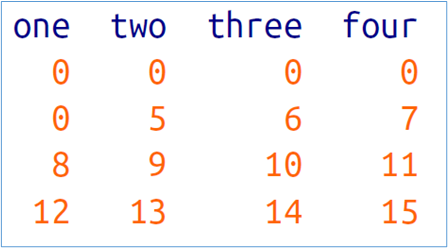


In [39]:
prompt510 = """Crie uma função em Python que utilize a biblioteca pandas e o tipo DataFrame para realizar a seguinte transformação:

A função deve receber uma lista de dicionários como entrada, onde cada dicionário representa uma linha de dados.

Converta a lista de dicionários em um DataFrame.

Substitua todos os valores menores que 5 por 0 no DataFrame.

Converta o DataFrame modificado de volta para uma lista de dicionários.

Retorne a lista de dicionários como resultado."""

In [40]:
validate(prompt510, "A5-E10")

Codigo gerado: 
def transformar_dados(lista_dicionarios):
    # Converte a lista de dicionários em um DataFrame
    df = pd.DataFrame(lista_dicionarios)
    
    # Substitui todos os valores menores que 5 por 0
    df[df < 5] = 0
    
    # Converte o DataFrame modificado de volta para uma lista de dicionários
    lista_resultado = df.to_dict(orient='records')
    
    # Retorna a lista de dicionários como resultado
    return lista_resultado

✅ Passed the Test Case!
  Expected: [{'four': 0, 'one': 0, 'three': 0, 'two': 0}, {'four': 7, 'one': 0, 'three': 6, 'two': 5}, {'four': 11, 'one': 8, 'three': 10, 'two': 9}, {'four': 15, 'one': 12, 'three': 14, 'two': 13}]
  Delivered: [{'four': 0, 'one': 0, 'three': 0, 'two': 0}, {'four': 7, 'one': 0, 'three': 6, 'two': 5}, {'four': 11, 'one': 8, 'three': 10, 'two': 9}, {'four': 15, 'one': 12, 'three': 14, 'two': 13}]


### Exercício de Reflexão (Facultativo)
#### Você aprendeu alguma coisa que pode ser reaproveitado em outros problemas?
#### Como você pode melhorar seu processo de elaboração de requisitos / prompts?
#### Você notou ambiguidade na sua especificação inicial?

In [ ]:
resposta="""AQUI"""

In [ ]:
validate(resposta, "A5-R1")